In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)"""

'\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)'

In [ ]:
#download = drive.CreateFile({'id': '1k-1Q1HuSW12_lU782IuIu0qpNiw7bt_l'})


In [ ]:
#download.GetContentFile('task_677_part01.zip')
#!unzip task_677_part01.zip -d zebra_dataset

In [ ]:
#!pip install split-folders



In [ ]:
import os
os.listdir('/content/drive/MyDrive/dataset')

['test', 'train', 'dataset']

In [ ]:
import os, os.path, shutil

folder_path = "/content/drive/MyDrive/dataset/train"

images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
c=0
len(images)


1855

In [ ]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1
		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs
		# loop over the number of filters
		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)
		# build the encoder model
		encoder = Model(inputs, latent, name="encoder")
    # start building the decoder model which will accept the
		# output of the encoder as its inputs
		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)
		# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)
		# build the decoder model
		decoder = Model(latentInputs, outputs, name="decoder")
		# our autoencoder is the encoder + decoder
		autoencoder = Model(inputs, decoder(encoder(inputs)),
			name="autoencoder")
		# return a 3-tuple of the encoder, decoder, and autoencoder
		return (encoder, decoder, autoencoder)
print("dd")

In [ ]:
import os
import cv2
from tqdm import tqdm
path = '/content/drive/MyDrive/dataset/test'
test_data=[]
for img in tqdm(os.listdir(path)):
  img_array2=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
  try:
    if img_array2.shape!=None:
      pass
    img_array2=cv2.resize(img_array2,(224,224))
    #img_array2 = img_array2.reshape(1,224,224,3)
    test_data.append(img_array2)
  except:
    continue
img[10]

100%|██████████| 520/520 [00:05<00:00, 102.80it/s]


'4'

In [ ]:
path = '/content/drive/MyDrive/dataset/train'
training_data=[]
for img in tqdm(os.listdir(path)):
  img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
  img_array=cv2.resize(img_array,(224,224))
  #img_array = img_array.reshape(1,224,224,3)
  training_data.append(img_array)
img[10]

100%|██████████| 1855/1855 [00:17<00:00, 106.17it/s]


'4'

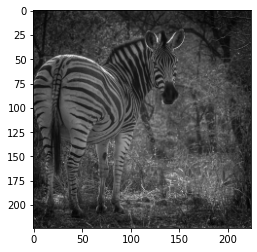

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_data=np.array(test_data)
#print(test_data[125])
plt.imshow(test_data[125])
plt.show()

(1855, 224, 224, 3)


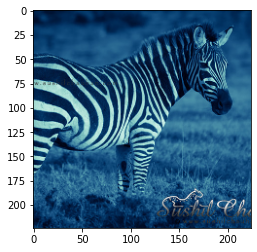

In [ ]:
import matplotlib.pyplot as plt
training_data=np.array(training_data)
print(training_data.shape)
plt.imshow(training_data[125])
plt.show()

In [ ]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
import numpy as np

EPOCHS = 20
INIT_LR = 1e-3
BS = 32
#X_train = np.expand_dims(training_data, axis=-1)
X_train = training_data.astype("float32") / 255.0
print(X_train[125].shape)
#X_test = np.expand_dims(test_data, axis=-1)
X_test = test_data.astype("float32") / 255.0
print(X_test[125].shape)

(224, 224, 3)
(224, 224, 3)


In [ ]:
print(X_test[125].shape)

(224, 224, 3)


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import numpy as np

base_model = VGG16(weights='imagenet',input_shape = (224, 224, 3)) # Shape of our images
print(base_model.summary)
#for layer in base_model.layers:
    #layer.trainable = False
model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)
X_train = preprocess_input(X_train)
X_test=preprocess_input(X_test)
#pred=model.predict(X_train,50)
out=model.outputs
#model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
print(out)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f482b61e610>>
[<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import numpy as np

base_model2 = VGG16(weights='imagenet',input_shape = (224, 224, 3)) # Shape of our images
print(base_model.summary)
#for layer in base_model.layers:
    #layer.trainable = False
model2 = Model(inputs=base_model2.input, outputs=base_model2.get_layer('block3_pool').output)

pred2=model.predict(X_train[1])
out2=model2.outputs
#model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])
print(out2)
print(pred2)

In [ ]:
X_train.shape
#pred=model.predict(X_train)
##model.compile(optimizer = RMSprop(lr=0.0001),loss='mean_squared_error',metrics = ['acc'])
#out=model.outputs

(1855, 224, 224, 3)

In [ ]:
os.listdir("/content/drive/MyDrive/")

['How to get started with Drive.pdf',
 'konkoor',
 'aks',
 'ferdowsi stuff',
 'SocialNetwork_USER_PASS - Soroush.xlsx',
 'flash baba',
 '4_5823593646099793070 (2).cpp.gdoc',
 '4_5823593646099793070 (1).cpp.gdoc',
 '4_5823593646099793070.cpp.gdoc',
 '4_5922252107200595557.c.gdoc',
 'project',
 'Colab Notebooks',
 '4_5949274336325010695 (2).gdoc',
 '4_5949274336325010695 (1).gdoc',
 '4_5949274336325010696 (1).gdoc',
 '4_5949274336325010696.gdoc',
 '4_5949274336325010695.gdoc',
 '4_5976826671787935796.gdoc',
 '4_5778231421290153754.gdoc',
 'task_677_part01.zip',
 'zebra_dataset',
 'Copy of task_677_part01.zip',
 'z_dataset',
 'pickles',
 'dataset']

In [ ]:
import pickle

#pickle_out = open("x_pred1800.pickle","wb")
#pickle.dump(pred, pickle_out)
#pickle_out.close()
pickle_in = open("/content/drive/MyDrive/pickles/x_pred1800.pickle","rb")
pred = pickle.load(pickle_in)
print("pickle loaded")

pickle loaded


In [ ]:
pickle_in = open("/content/drive/MyDrive/pickles/x_pred500.pickle","rb")
pred_test= pickle.load(pickle_in)
print("pickle loaded")

pickle loaded


In [ ]:
pred_test=model.predict(X_test,50)


pickle saved test


In [ ]:
pickle_out = open("x_pred500.pickle","wb")
pickle.dump(pred_test, pickle_out)
pickle_out.close()
print("pickle saved test")

pickle saved test


In [ ]:
pred[1]

In [ ]:
!pip install pyod
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
print("dd")

dd


**and now we feed pyod with flatten pred**

1.   List item
2.   List item



In [ ]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=0.05),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=0.05),
     'Isolation Frost': IForest(contamination=0.05)
}

In [ ]:
#set the figure size
from pyod.utils.data import evaluate_print

from matplotlib import pyplot as plt
from scipy import stats
y_preds=[]
y_preds_test=[]
plt.figure(figsize=(10, 10))
outlier_fraction=0.05
for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(pred)
    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores 
    print("y_train_pred is :",y_train_pred)
    #print("y_train_scores is :",y_train_scores)
    # get the prediction on the test data
    y_preds_test.append( clf.predict(pred_test)  ) # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(pred_test)  # outlier scores
   # print("y_test_pred is :",y_test_pred)
    #print("y_test_scores is :",y_test_scores)

    #train_scores[:, i] = clf.decision_scores_
    #test_scores[:, i] = clf.decision_function(pred_test)
    #print("train score is   : ",train_scores)
    #print("test score is   : ",test_scores)
    # predict raw anomaly score
    scores_pred = clf.decision_function(pred)*-1
    #print(str(i)+"  sores pred:",scores_pred)
    # prediction of a datapoint category outlier or inlier
    y_preds.append( clf.predict(pred))
   

    
    
    # no of errors in prediction
    #n_errors = (y_pred != Y_train).sum()
   # print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization
"""
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() """

y_train_pred is : [0 0 1 ... 0 0 0]
y_train_pred is : [0 0 1 ... 0 0 0]
y_train_pred is : [0 0 1 ... 0 0 0]


"\n    # threshold value to consider a datapoint inlier or outlier\n    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)\n\n    # decision function calculates the raw anomaly score for every point\n    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1\n    Z = Z.reshape(xx.shape)\n\n    subplot = plt.subplot(1, 2, i + 1)\n\n    # fill blue colormap from minimum anomaly score to threshold value\n    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)\n\n    # draw red contour line where anomaly score is equal to threshold\n    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')\n\n    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score\n    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')\n\n    # scatter plot of inliers with white dots\n    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='

<Figure size 720x720 with 0 Axes>

100%|██████████| 1855/1855 [00:01<00:00, 1160.49it/s]


anomalies detected : 89 in  1855  items


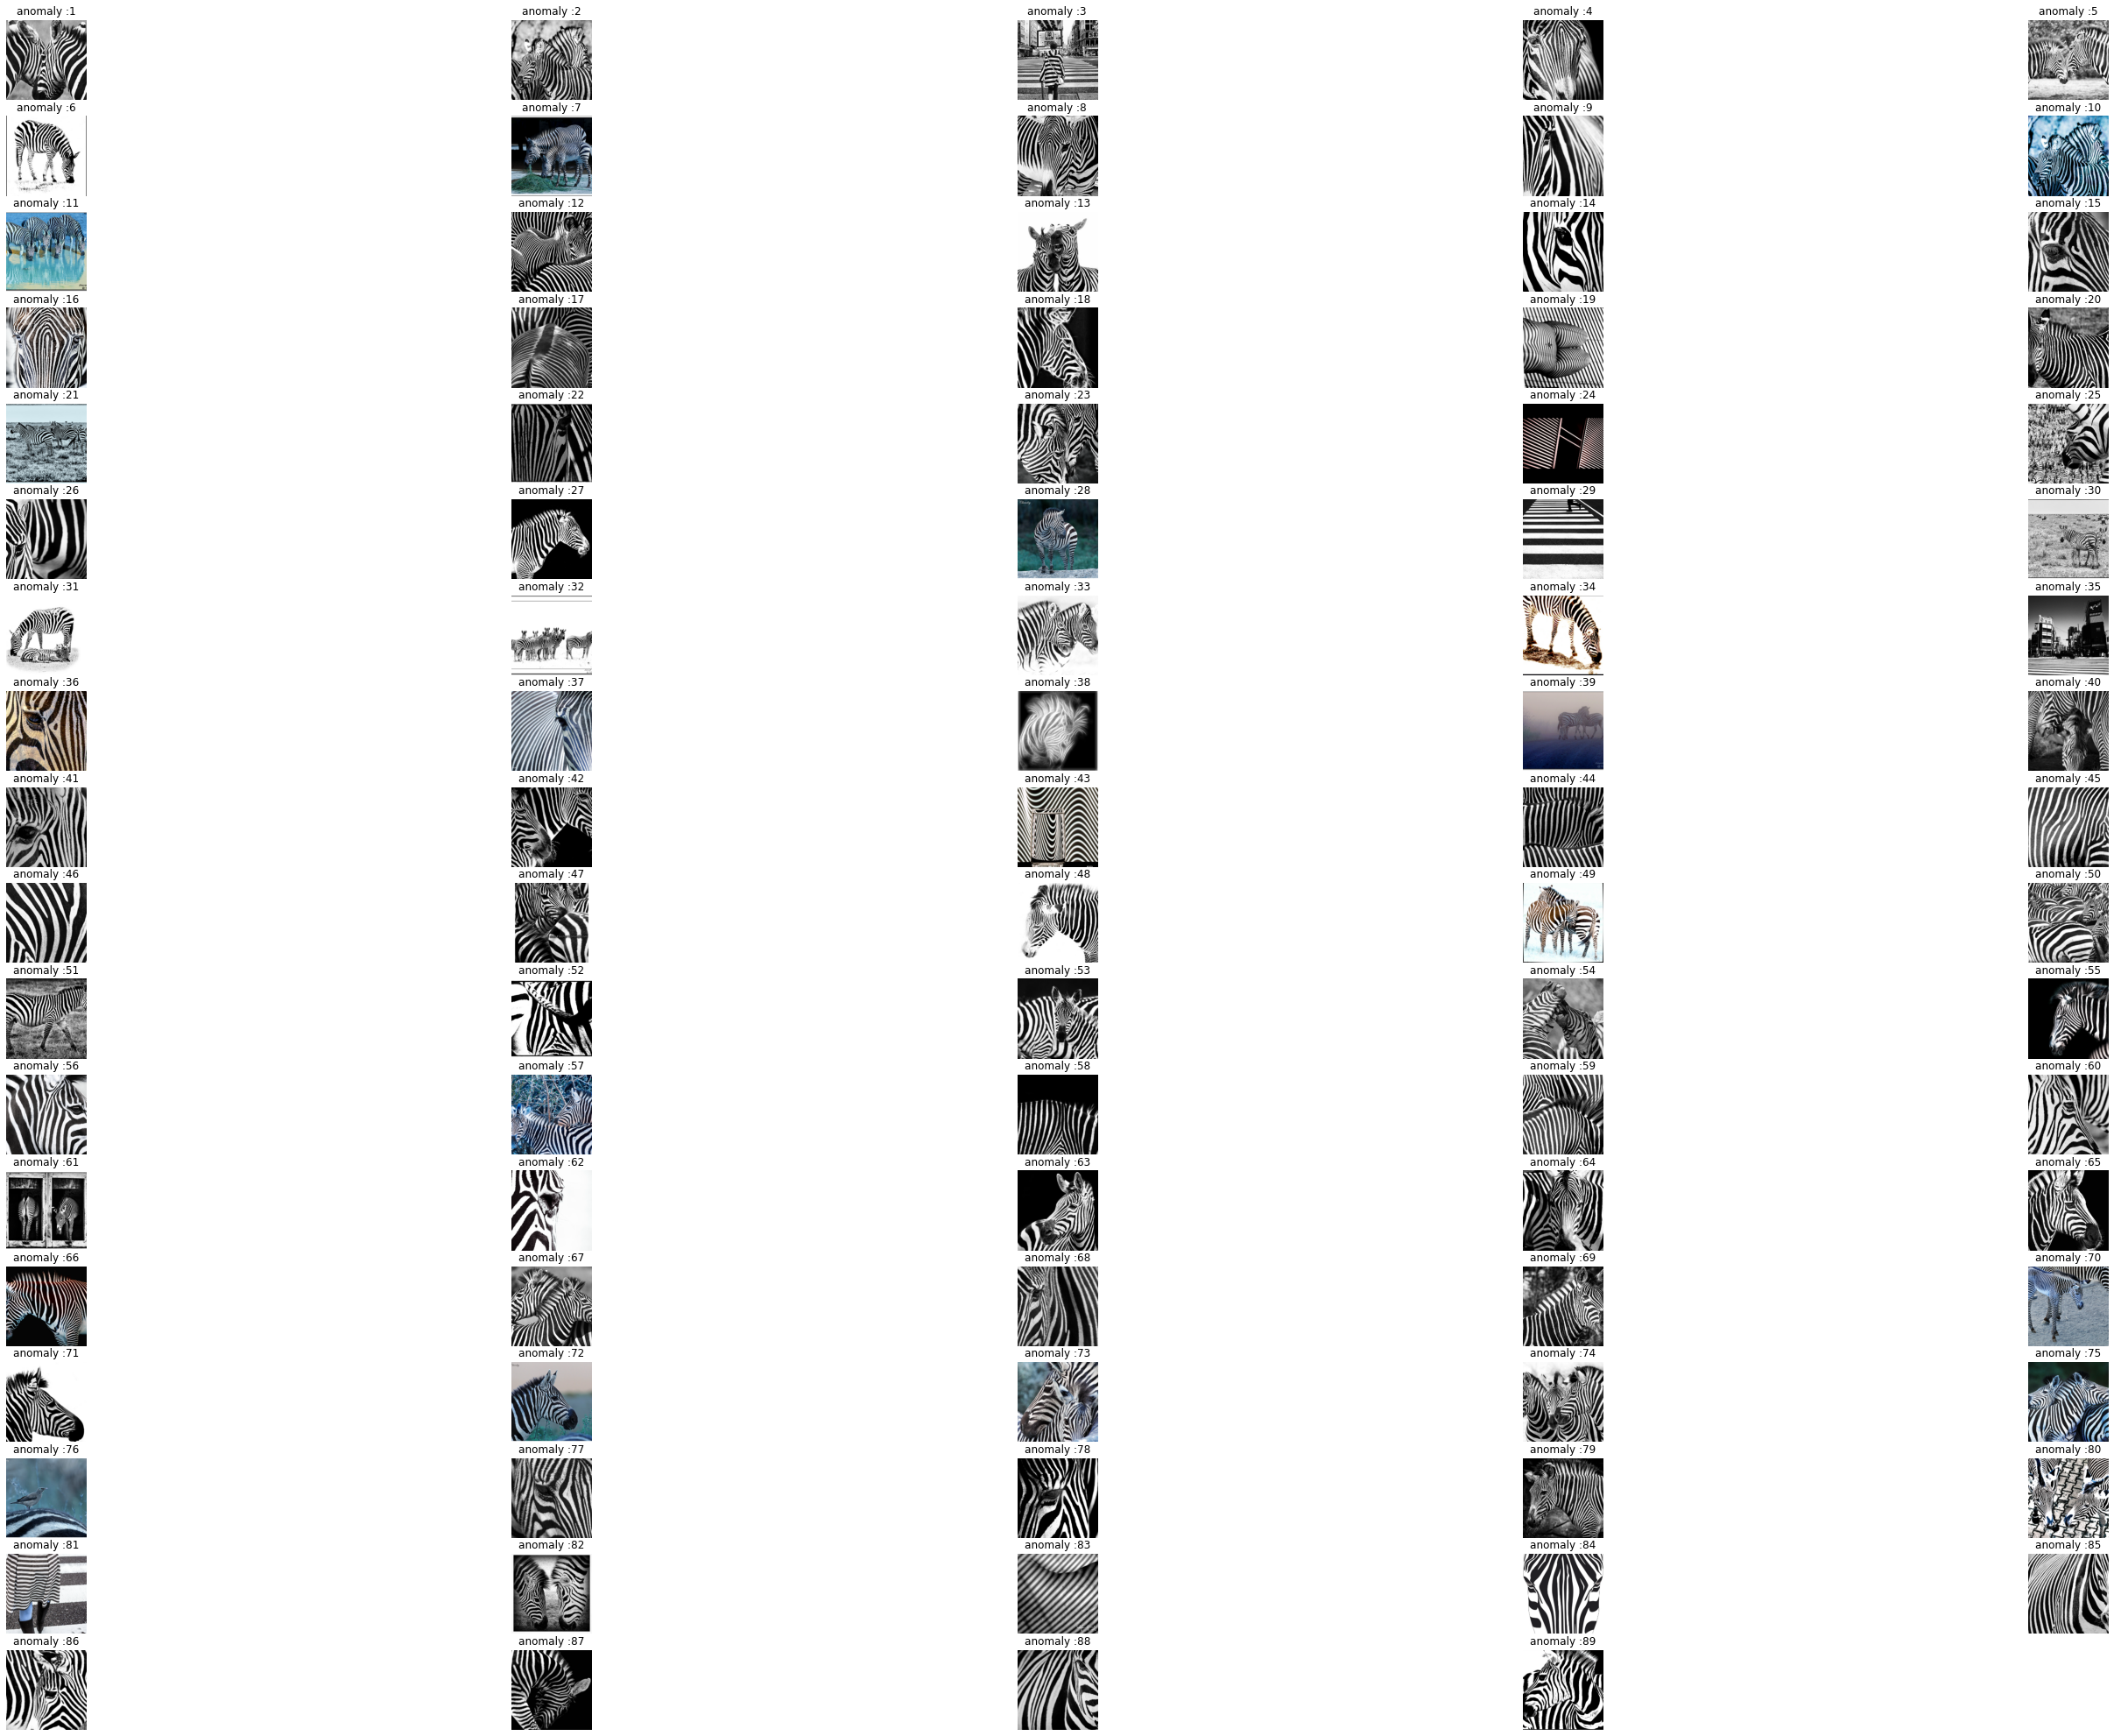

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
one_count=0
arr=np.array(y_preds)
arr=arr.sum(axis=0)/3
arr
fig = plt.figure(figsize=(50, 50))
  
# setting values to rows and column variables
rows = 25
columns = 5
for i in tqdm(range(len(arr))):
  if arr[i]>0.5:
    one_count+=1
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, one_count)
  
# showing image
    plt.imshow(training_data[i])
    plt.axis('off')
    plt.title("anomaly :" + str(one_count))
  
    #cv2_imshow(training_data[i])
    #plt.show()
print("anomalies detected :",one_count,"in ",len(arr)," items")

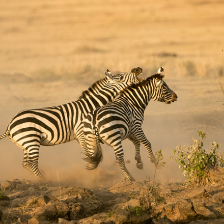

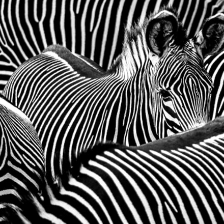

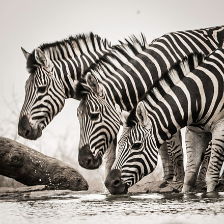

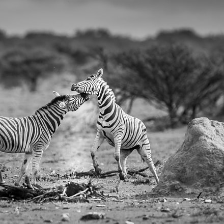

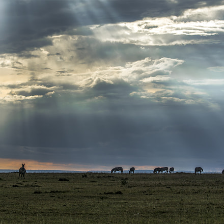

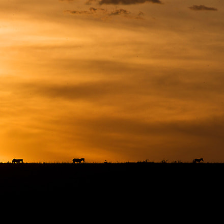

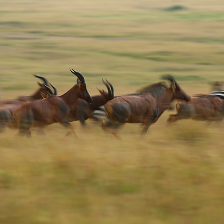

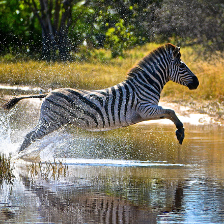

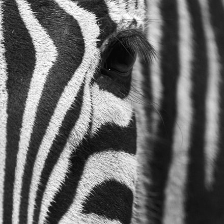

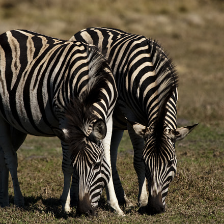

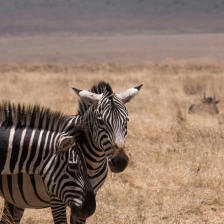

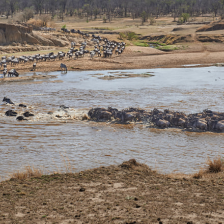

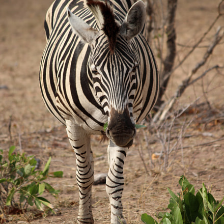

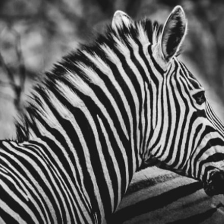

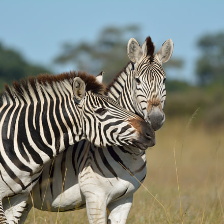

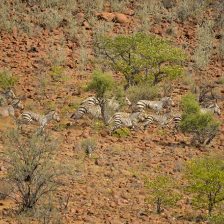

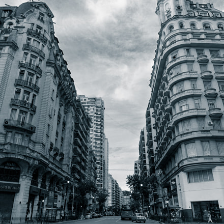

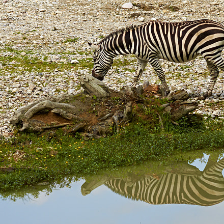

IndexError: ignored

In [ ]:
from google.colab.patches import cv2_imshow
one_count=0
zero_count=0
for i in range(y_pred.shape[0]):
  if y_pred[i]==1:
    
    one_count+=1
    cv2_imshow(training_data[i])
    plt.show()
print(one_count)
    

In [ ]:
fitted = model.fit(X_train,X_train,batch_size=50, steps_per_epoch = 100, epochs = 5)



In [ ]:
from tensorflow.keras.optimizers import Adam
print("[INFO] building autoencoder...")

#ConvAutoencoder.
#ConvAutoencoder=ConvAutoencoder()
(encoder, decoder, autoencoder) = ConvAutoencoder.build(440, 440, 3)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
autoencoder.compile(loss="mse", optimizer=opt)
# train the convolutional autoencoder
H = autoencoder.fit(
	X_train, X_train,
	validation_data=(X_test, X_test),
	epochs=EPOCHS,
	batch_size=BS)

[INFO] building autoencoder...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20


In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image, ImageChops
from sklearn.neighbors import KernelDensity
import random
print("done")



done


In [ ]:
# Create generators for training, validation and testing
# Generate data from the images in a folder, allows use of datasets that do not fit in main memory all at once
# Image resizing is done by the generator so a folder with any sized-images can be used
# The named directory must contain one or more subfolders, path should look like apples_train/apple_class1/img1.jpg...

batch_size = 35
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
train_generator = train_datagen.flow_from_directory(
    '../dataset/train_dataset',
    target_size=(96, 96),
    batch_size=batch_size,
    class_mode='input'
    )

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
validation_generator = test_datagen.flow_from_directory(
    '../dataset/test_dataset',
    target_size=(96, 96),
    batch_size=batch_size,
    class_mode='input'
    )



Found 2501 images belonging to 1 classes.
Found 499 images belonging to 1 classes.


In [ ]:
# Define the convolutional autoencoder model 
# input shape must be the same size as the images that will be fed into it by the generators
# The output layer must be the same dimensions as the original image
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D(pool_size=(4,4), padding='same')) # using pool_size (4,4) makes the layer 4x smaller in height and width

model.add(Conv2D(8,(3, 3),activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(4,4), padding='same'))

model.add(Conv2D(3,(3, 3),activation='relu',  padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#-------------------------
model.add(Conv2D(3,(3, 3),activation='relu',  padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(8,(3, 3),activation='relu',  padding='same'))
model.add(UpSampling2D((4, 4)))

model.add(Conv2D(16,(3, 3),activation='relu',  padding='same'))
model.add(UpSampling2D((4, 4)))

model.add(Conv2D(3,(3, 3), activation='softmax', padding='same'))
#-------------------------

model.summary()

# Compile the model
model.compile(optimizer='adadelta', loss='mean_squared_error')

NameError: ignored

In [ ]:
# Training the model
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = 'models/model1.keras'
save_best = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min') # Saves the best version of the model to disk (as measured on the validation data set)
model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=1000 // batch_size,
        shuffle = True,
        callbacks=[es, save_best])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
28/28 [==============================] - 23s 812ms/step - loss: 0.0866 - val_loss: 0.0875
Epoch 2/60
28/28 [==============================] - 17s 591ms/step - loss: 0.0840
Epoch 3/60
28/28 [==============================] - 17s 597ms/step - loss: 0.0875
Epoch 4/60
28/28 [==============================] - 17s 591ms/step - loss: 0.0852
Epoch 5/60
28/28 [==============================] - 17s 606ms/step - loss: 0.0849
Epoch 6/60
28/28 [==============================] - 17s 590ms/step - loss: 0.0844
Epoch 7/60
28/28 [==============================] - 17s 600ms/step - loss: 0.0833
Epoch 8/60
28/28 [==============================] - 17s 600ms/step - loss: 0.0870
Epoch 9/60
28/28 [==============================] - 17s 599ms/step - loss: 0.0871
Epoch 10/60
28/28 [==============================] - 17s 599ms/step - loss: 0.0843
Epoch 11/60
28/28 [==============================] - 17s 583ms/step - loss: 0.0872
Epoch 12/60
28/28 [==============================] - 17s 599ms/step - loss: 0

In [ ]:
# Training continues after improvement stops for the number of epochs equivalent to the 'patience' hyper-parameter
# To get back the model that performed best on the validation set we load the checkpointed model from disk:
model = keras.models.load_model(model_filepath)

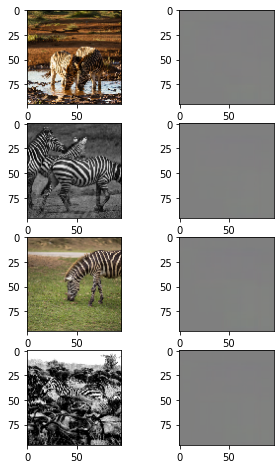

In [ ]:
# Test the model by viewing a sample of original and reconstructed images
data_list = []
batch_index = 0
while batch_index <= train_generator.batch_index:
    data = train_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1

predicted = model.predict(data_list[0])
no_of_samples = 4
_, axs = plt.subplots(no_of_samples, 2, figsize=(5, 8))
axs = axs.flatten()
imgs = []
for i in range(no_of_samples):
    imgs.append(data_list[i][i])
    imgs.append(predicted[i])
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()